### Import Required libraries

In [138]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [105]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [106]:
# drop index
df = df.drop("instant", axis=1)

In [107]:
# as we only concerned with total bookings we can drop the casual and registered columns
df = df.drop(["casual","registered"], axis=1)
df.shape


(730, 13)

In [108]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 74.2+ KB


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [109]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Visualize the data(EDA Analysis)

##### Visualising Numeric Variables


<Figure size 1440x864 with 0 Axes>

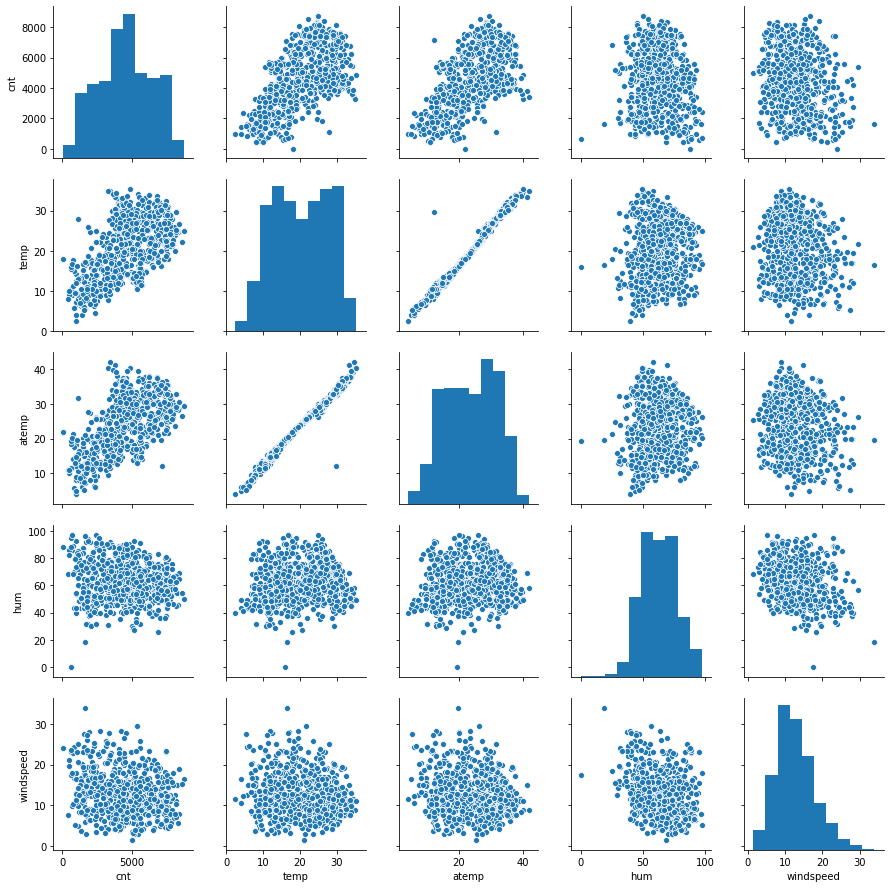

In [110]:
plt.figure(figsize=(20, 12))
cols = ["cnt","temp","atemp","hum","windspeed"]
sns.pairplot(df[cols])
plt.show()

## BoxPlot for categorical Variables

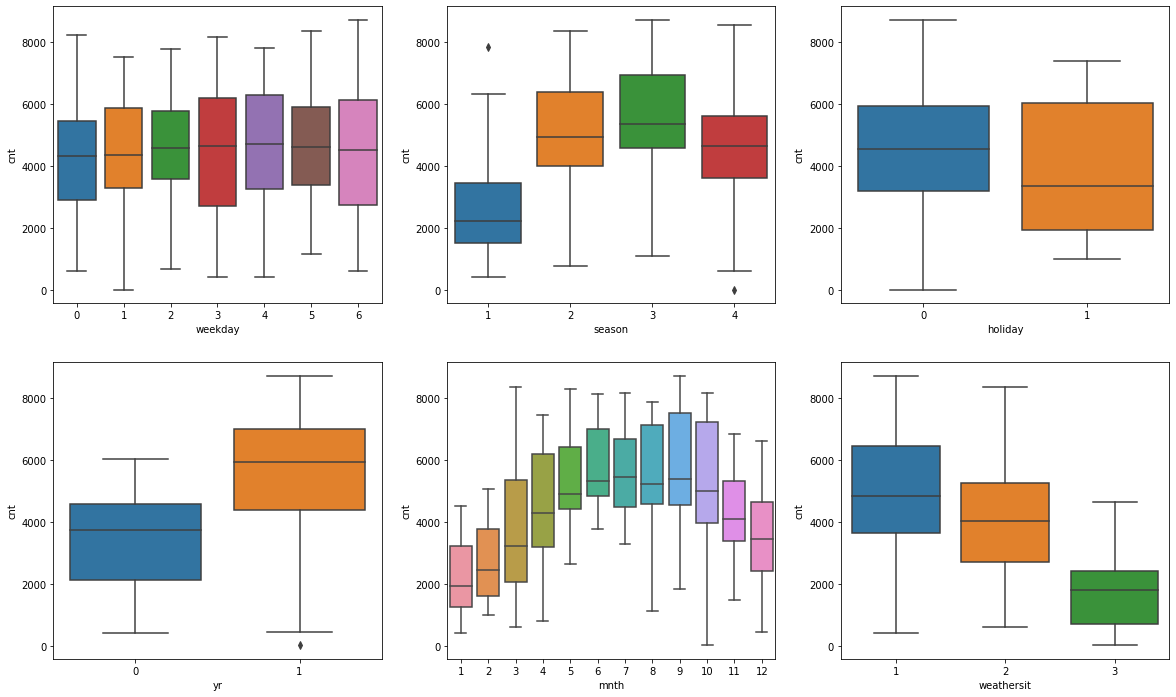

In [111]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)



plt.show()

In [112]:
# Correlation matrix

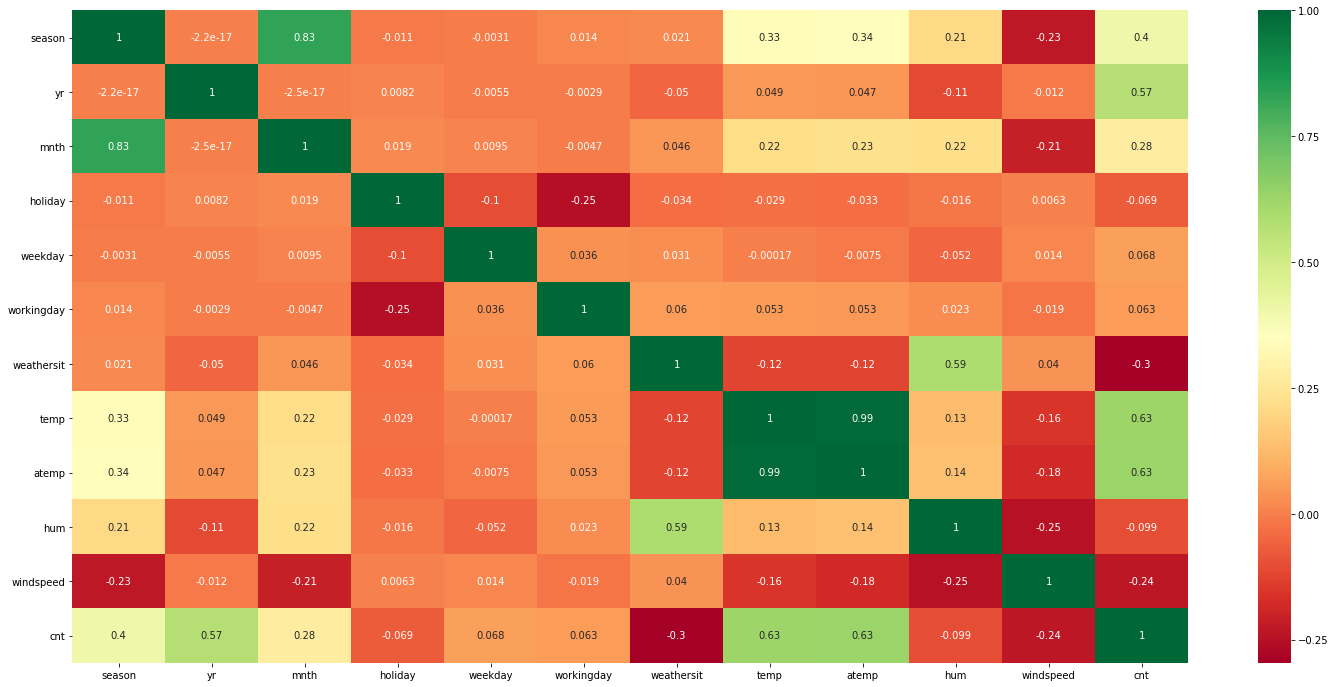

In [113]:
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [114]:
## as temp and atemp are perfectly aligned with corr .99, we can remove 1 of them. Lets remove temp

In [115]:
df = df.drop("temp", axis=1)

In [127]:

df = df.drop("dteday", axis=1)

In [116]:
# Mapping Categorical Variables
df["weathersit"] = df.weathersit.map({1:"Clear",2:"Mist + Cloudy", 3: "Light Snow",4: "Snow + Fog"})
df["mnth"] = df.mnth.map({1:"Jan", 2:"Feb", 3:"Mar",4: "Apr", 5:"May",6:"Jun", 7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [117]:
df["season"] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [118]:
df["weekday"] = df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

In [119]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


## Data Preparation - Dummy variables 


In [120]:
mon = pd.get_dummies(df.mnth, drop_first=True)
wd = pd.get_dummies(df.weekday, drop_first= True)
ssn = pd.get_dummies(df.season, drop_first = True)
ws = pd.get_dummies(df.weathersit, drop_first = True)

In [121]:
df = pd.concat([df,mon,wd,ssn,ws], axis= 1 )
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,18.18125,80.5833,...,1,0,0,0,0,1,0,0,0,1
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,17.68695,69.6087,...,0,1,0,0,0,1,0,0,0,1
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,...,0,0,0,1,0,1,0,0,0,0
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,...,0,0,0,0,1,1,0,0,0,0


In [122]:
## Drop the above columns as dummy variables are created agianst it.
df = df.drop(["mnth","weekday","season","weathersit"], axis=1)


In [128]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [129]:
df.shape

(730, 29)

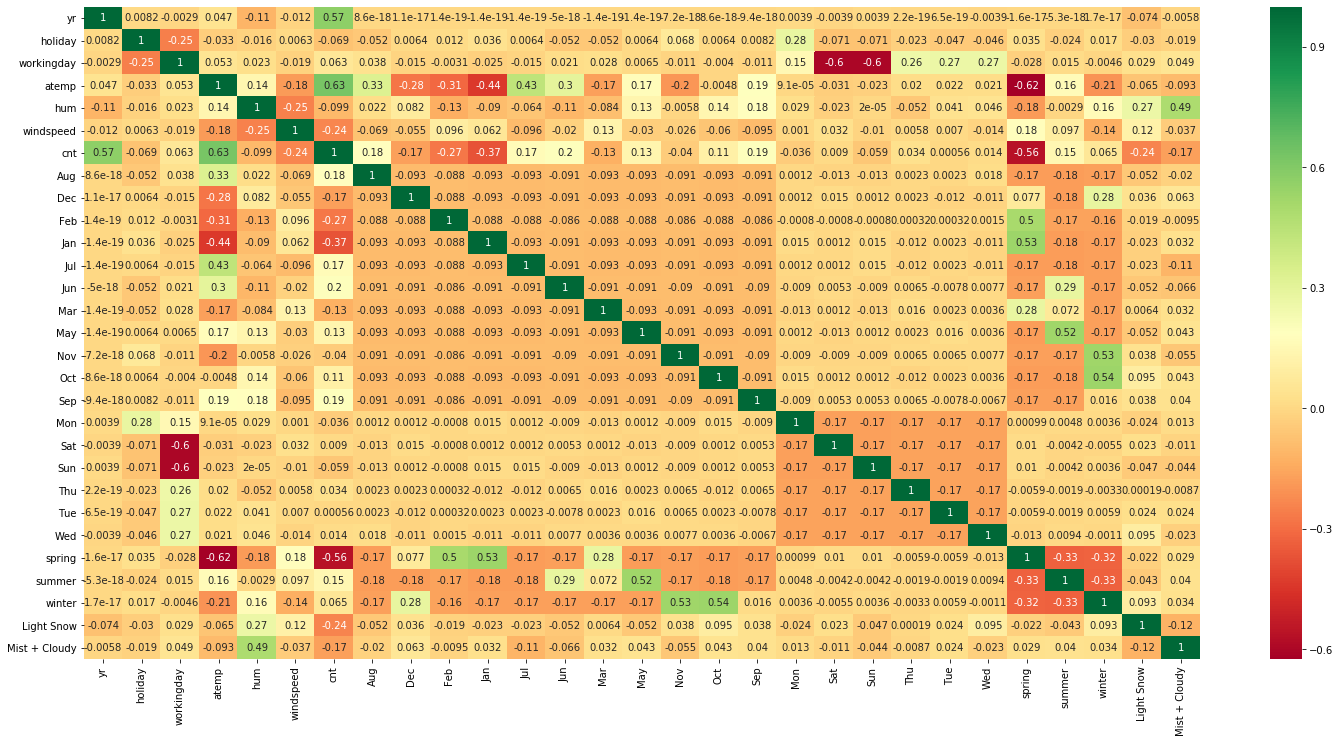

In [130]:
## Printing the correlation matrix to see the correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr               730 non-null int64
holiday          730 non-null int64
workingday       730 non-null int64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
cnt              730 non-null int64
Aug              730 non-null uint8
Dec              730 non-null uint8
Feb              730 non-null uint8
Jan              730 non-null uint8
Jul              730 non-null uint8
Jun              730 non-null uint8
Mar              730 non-null uint8
May              730 non-null uint8
Nov              730 non-null uint8
Oct              730 non-null uint8
Sep              730 non-null uint8
Mon              730 non-null uint8
Sat              730 non-null uint8
Sun              730 non-null uint8
Thu              730 non-null uint8
Tue              730 non-null uint8
Wed              730 non-null uint8
spring           730 non-

In [134]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100 )

In [135]:
## Rescaling of Features

In [139]:
scaler = MinMaxScaler()

In [140]:
num_vars = ["atemp","windspeed","hum","windspeed"]

In [141]:
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

/Users/rajatgoel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/rajatgoel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [142]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,spring,summer,winter,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,4485.337255,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,1950.666077,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
